In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from statistics import mean, median, mode, stdev
import ast
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
Movie = pd.read_csv('movie_collection_data_revenuedesc.csv',na_filter=True, na_values=['[]','NaN'])
Movie.head()

,Movie_name,Adult,GenreList,Budget,Popularity,VoteAvg,VoteCount,Overview,Tagline,Revenue,ReleaseDate,Runtime,OriginalLanguage,ProductionCompany,ProductionCountry,SpokenLanguage
0,Doo,True,NaN,3000000,0.6,0.0,0,Doo takes Manhattan,NaN,540000000000,NaN,300,en,NaN,NaN,['ba']
1,Avengers: Endgame,False,"['Adventure', 'Science Fiction', 'Action']",356000000,266.554,8.3,17776,After the devastating events of Avengers: Infi...,Part of the journey is the end.,2797800564,2019-04-24,181,en,"[['Marvel Studios', 'US']]",['US'],"['en', 'ja', 'xh']"
2,Avatar,False,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",237000000,91.055,7.5,23164,"In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,2787965087,2009-12-10,162,en,"[['Dune Entertainment', 'US'], ['Lightstorm En...","['US', 'GB']","['en', 'es']"
3,Titanic,False,"['Drama', 'Romance']",200000000,76.323,7.9,18970,101-year-old Rose DeWitt Bukater tells the sto...,Nothing on Earth could come between them.,2187463944,1997-11-18,194,en,"[['Paramount', 'US'], ['Lightstorm Entertainme...",['US'],"['en', 'fr', 'de', 'sv', 'it', 'ru']"
4,Star Wars: The Force Awakens,False,"['Action', 'Adventure', 'Science Fiction', 'Fa...",245000000,51.502,7.4,15668,Thirty years after defeating the Galactic Empi...,Every generation has a story.,2068223624,2015-12-15,136,en,"[['Lucasfilm Ltd.', 'US'], ['Bad Robot', 'US']]",['US'],['en']


# Dropping invalid Data

In [3]:
## Drop INVALID DATA
Numericlist = ['Budget','Popularity','VoteAvg','VoteCount','Revenue','Runtime']
for item in Numericlist:
    Movie[str(item)] = pd.to_numeric(Movie[str(item)], errors='coerce').fillna(0)
Movie_CleanedData = Movie.dropna(subset=['ReleaseDate','SpokenLanguage','ProductionCompany','ProductionCountry','GenreList'])
Movie_CleanedData = Movie_CleanedData[~(Movie_CleanedData['Budget']<281)]
Movie_CleanedData = Movie_CleanedData[~(Movie_CleanedData['Revenue']==0)]
Movie_CleanedData.drop_duplicates(subset="Movie_name", inplace =True)
Movie_CleanedData.index = pd.RangeIndex(len(Movie_CleanedData.index))
Movie_CleanedData.index = range(len(Movie_CleanedData.index))



## Calculate and Insert Profit Variable

In [4]:
Profit=[]
for i in range(len(Movie_CleanedData)):
    Profit.append(Movie_CleanedData.loc[i,'Revenue']-Movie_CleanedData.loc[i,'Budget'])
Movie_CleanedData.insert(10,"Profit",Profit,True)

## Create new column for release year and month

In [5]:
Movie_CleanedData['Year'] = pd.DatetimeIndex(Movie_CleanedData['ReleaseDate']).year
Movie_CleanedData['Month'] = pd.DatetimeIndex(Movie_CleanedData['ReleaseDate']).month

In [6]:
Movie_CleanedData.head(10)

,Movie_name,Adult,GenreList,Budget,Popularity,VoteAvg,VoteCount,Overview,Tagline,Revenue,Profit,ReleaseDate,Runtime,OriginalLanguage,ProductionCompany,ProductionCountry,SpokenLanguage,Year,Month
0,Avengers: Endgame,False,"['Adventure', 'Science Fiction', 'Action']",356000000.0,266.554,8.3,17776.0,After the devastating events of Avengers: Infi...,Part of the journey is the end.,2.797801e+09,2.441801e+09,2019-04-24,181.0,en,"[['Marvel Studios', 'US']]",['US'],"['en', 'ja', 'xh']",2019,4
1,Avatar,False,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",237000000.0,91.055,7.5,23164.0,"In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,2.787965e+09,2.550965e+09,2009-12-10,162.0,en,"[['Dune Entertainment', 'US'], ['Lightstorm En...","['US', 'GB']","['en', 'es']",2009,12
2,Titanic,False,"['Drama', 'Romance']",200000000.0,76.323,7.9,18970.0,101-year-old Rose DeWitt Bukater tells the sto...,Nothing on Earth could come between them.,2.187464e+09,1.987464e+09,1997-11-18,194.0,en,"[['Paramount', 'US'], ['Lightstorm Entertainme...",['US'],"['en', 'fr', 'de', 'sv', 'it', 'ru']",1997,11
3,Star Wars: The Force Awakens,False,"['Action', 'Adventure', 'Science Fiction', 'Fa...",245000000.0,51.502,7.4,15668.0,Thirty years after defeating the Galactic Empi...,Every generation has a story.,2.068224e+09,1.823224e+09,2015-12-15,136.0,en,"[['Lucasfilm Ltd.', 'US'], ['Bad Robot', 'US']]",['US'],['en'],2015,12
4,Avengers: Infinity War,False,"['Adventure', 'Action', 'Science Fiction']",300000000.0,283.248,8.3,21470.0,As the Avengers and their allies have continue...,An entire universe. Once and for all.,2.046240e+09,1.746240e+09,2018-04-25,149.0,en,"[['Marvel Studios', 'US']]",['US'],"['en', 'xh']",2018,4
5,Jurassic World,False,"['Action', 'Adventure', 'Science Fiction', 'Th...",150000000.0,68.575,6.6,16686.0,Twenty-two years after the events of Jurassic ...,The park is open.,1.671713e+09,1.521713e+09,2015-06-06,124.0,en,"[['Amblin Entertainment', 'US'], ['Legendary P...",['US'],['en'],2015,6
6,The Lion King,False,"['Adventure', 'Family', 'Animation']",260000000.0,94.877,7.2,7563.0,"Simba idolizes his father, King Mufasa, and ta...",The King has Returned.,1.656943e+09,1.396943e+09,2019-07-12,118.0,en,"[['Walt Disney Pictures', 'US'], ['Fairview En...",['US'],['en'],2019,7
7,The Avengers,False,"['Science Fiction', 'Action', 'Adventure']",220000000.0,139.977,7.7,24419.0,When an unexpected enemy emerges and threatens...,Some assembly required.,1.518816e+09,1.298816e+09,2012-04-25,143.0,en,"[['Marvel Studios', 'US'], ['Paramount', 'US']]",['US'],"['en', 'hi', 'ru']",2012,4
8,Furious 7,False,"['Action', 'Thriller']",190000000.0,73.657,7.3,8239.0,Deckard Shaw seeks revenge against Dominic Tor...,Vengeance Hits Home,1.515048e+09,1.325048e+09,2015-04-01,137.0,en,"[['Abu Dhabi Film Commission', ''], ['Universa...",['US'],['en'],2015,4
9,Frozen II,False,"['Family', 'Animation', 'Adventure', 'Comedy',...",150000000.0,154.917,7.3,7232.0,"Elsa, Anna, Kristoff and Olaf head far into th...",The past is not what it seems.,1.450027e+09,1.300027e+09,2019-11-20,103.0,en,"[['Walt Disney Pictures', 'US'], ['Walt Disney...",['US'],['en'],2019,11


In [7]:
Movie_CleanedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6707 entries, 0 to 6706
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Movie_name         6707 non-null   object 
 1   Adult              6707 non-null   object 
 2   GenreList          6707 non-null   object 
 3   Budget             6707 non-null   float64
 4   Popularity         6707 non-null   float64
 5   VoteAvg            6707 non-null   float64
 6   VoteCount          6707 non-null   float64
 7   Overview           6691 non-null   object 
 8   Tagline            5563 non-null   object 
 9   Revenue            6707 non-null   float64
 10  Profit             6707 non-null   float64
 11  ReleaseDate        6707 non-null   object 
 12  Runtime            6707 non-null   float64
 13  OriginalLanguage   6707 non-null   object 
 14  ProductionCompany  6707 non-null   object 
 15  ProductionCountry  6707 non-null   object 
 16  SpokenLanguage     6707 

In [8]:
Movie_CleanedData.GenreList.head(1000000)

0              ['Adventure', 'Science Fiction', 'Action']
1       ['Action', 'Adventure', 'Fantasy', 'Science Fi...
2                                    ['Drama', 'Romance']
3       ['Action', 'Adventure', 'Science Fiction', 'Fa...
4              ['Adventure', 'Action', 'Science Fiction']
5       ['Action', 'Adventure', 'Science Fiction', 'Th...
6                    ['Adventure', 'Family', 'Animation']
7              ['Science Fiction', 'Action', 'Adventure']
8                                  ['Action', 'Thriller']
9       ['Family', 'Animation', 'Adventure', 'Comedy',...
10             ['Action', 'Adventure', 'Science Fiction']
11             ['Action', 'Adventure', 'Science Fiction']
12                               ['Fantasy', 'Adventure']
13             ['Science Fiction', 'Action', 'Adventure']
14             ['Action', 'Adventure', 'Science Fiction']
15                   ['Animation', 'Adventure', 'Family']
16                       ['Family', 'Fantasy', 'Romance']
17         ['A

## Create Columns for Categorical Data


In [9]:
#change string in list format to list
for i in range(len(Movie_CleanedData)):
    x = ast.literal_eval(Movie_CleanedData.loc[i,'GenreList'])
    Movie_CleanedData.at[i,'GenreList'] = x
    
    x = ast.literal_eval(Movie_CleanedData.loc[i,'ProductionCompany'])
    Movie_CleanedData.at[i,'ProductionCompany'] = x
    
    x = ast.literal_eval(Movie_CleanedData.loc[i,'ProductionCountry'])
    Movie_CleanedData.at[i,'ProductionCountry'] = x
    
    x = ast.literal_eval(Movie_CleanedData.loc[i,'SpokenLanguage'])
    Movie_CleanedData.at[i,'SpokenLanguage'] = x

    
#count max number each category, to create number of columns
genrecount,production_company_count,production_country_count,spoken_language_count = 0,0,0,0

for i in range(len(Movie_CleanedData)):
    if len(Movie_CleanedData.loc[i,'GenreList'])>genrecount:
        genrecount = len(Movie_CleanedData.loc[i,'GenreList'])
    if len(Movie_CleanedData.loc[i,'ProductionCompany'])>production_company_count:
        production_company_count = len(Movie_CleanedData.loc[i,'ProductionCompany'])
    if len(Movie_CleanedData.loc[i,'ProductionCountry'])>production_country_count:
        production_country_count = len(Movie_CleanedData.loc[i,'ProductionCountry'])
    if len(Movie_CleanedData.loc[i,'SpokenLanguage'])>spoken_language_count:
        spoken_language_count = len(Movie_CleanedData.loc[i,'SpokenLanguage'])
        
       
print(genrecount)
print(production_company_count)
print(production_country_count)
print(spoken_language_count)
        
#to catch and ignore list out of index, replace with NONE.
def catch(var,i):
    try:
        return var[i]
    except Exception as e:
        return None
def catch2(var,i):
    try:
        return var[i][0]
    except Exception as e:
        return None
    
#replace
for i in range(1,genrecount+1):
    Movie_CleanedData.loc[:, 'Genre'+str(i)] = [catch(x, i-1) for x in Movie_CleanedData.GenreList]
    
for i in range(1,production_company_count+1):
    Movie_CleanedData.loc[:, 'ProductionCompany'+str(i)] = [catch2(x, i-1) for x in Movie_CleanedData.ProductionCompany]
    
for i in range(1,production_country_count+1):    
    Movie_CleanedData.loc[:, 'ProductionCountry'+str(i)] = [catch(x, i-1) for x in Movie_CleanedData.ProductionCountry]

for i in range(1,spoken_language_count+1):    
    Movie_CleanedData.loc[:, 'SpokenLanguage'+str(i)] = [catch(x, i-1) for x in Movie_CleanedData.SpokenLanguage]

8
26
12
11


In [10]:
Movie_CleanedData.describe()

,Budget,Popularity,VoteAvg,VoteCount,Revenue,Profit,Runtime,Year,Month
count,6.707000e+03,6707.000000,6707.000000,6707.000000,6.707000e+03,6.707000e+03,6707.000000,6707.000000,6707.000000
mean,2.950852e+07,20.508295,6.410258,1612.965558,8.652781e+07,5.701928e+07,111.049053,2001.340092,6.886686
std,4.161330e+07,155.826177,1.009427,2762.836250,1.714662e+08,1.449594e+08,23.250644,16.356842,3.417379
min,4.000000e+02,0.600000,0.000000,0.000000,3.343190e+05,-9.635208e+08,0.000000,1913.000000,1.000000
25%,5.000000e+06,8.279000,5.900000,136.000000,6.500000e+06,-6.321245e+05,96.000000,1995.000000,4.000000
50%,1.500000e+07,11.513000,6.500000,577.000000,2.556292e+07,9.200000e+06,107.000000,2006.000000,7.000000
75%,3.600000e+07,18.182000,7.100000,1756.000000,9.000005e+07,5.510605e+07,122.000000,2013.000000,10.000000
max,9.653130e+08,12276.164000,10.000000,28790.000000,2.797801e+09,2.550965e+09,339.000000,2021.000000,12.000000


## Determine outliers


## To ask prof how to deal with 0 vote count

In [11]:

Q1 = (int)(Movie_CleanedData.VoteCount.quantile(0.25)) 
Q3 = (int)(Movie_CleanedData.VoteCount.quantile(0.75))
median = (int)(Movie_CleanedData.VoteCount.quantile(0.5))
median_avg = (int)(Movie_CleanedData.VoteAvg.quantile(0.5))
IQR = Q3 - Q1

for i in range(len(Movie_CleanedData)): 
     if Movie_CleanedData.loc[i,'VoteCount']<(Q1 - 1.5 * IQR):
        Movie_CleanedData.loc[i,'VoteCount']=median
        Movie_CleanedData.loc[i,'VoteAvg'] = median_avg


In [12]:
Movie_CleanedData.describe()

,Budget,Popularity,VoteAvg,VoteCount,Revenue,Profit,Runtime,Year,Month
count,6.707000e+03,6707.000000,6707.000000,6707.000000,6.707000e+03,6.707000e+03,6707.000000,6707.000000,6707.000000
mean,2.950852e+07,20.508295,6.410258,1612.965558,8.652781e+07,5.701928e+07,111.049053,2001.340092,6.886686
std,4.161330e+07,155.826177,1.009427,2762.836250,1.714662e+08,1.449594e+08,23.250644,16.356842,3.417379
min,4.000000e+02,0.600000,0.000000,0.000000,3.343190e+05,-9.635208e+08,0.000000,1913.000000,1.000000
25%,5.000000e+06,8.279000,5.900000,136.000000,6.500000e+06,-6.321245e+05,96.000000,1995.000000,4.000000
50%,1.500000e+07,11.513000,6.500000,577.000000,2.556292e+07,9.200000e+06,107.000000,2006.000000,7.000000
75%,3.600000e+07,18.182000,7.100000,1756.000000,9.000005e+07,5.510605e+07,122.000000,2013.000000,10.000000
max,9.653130e+08,12276.164000,10.000000,28790.000000,2.797801e+09,2.550965e+09,339.000000,2021.000000,12.000000


## EXPLORATORY ANALYSIS

## Numeric Data

In [14]:
NumericData =pd.DataFrame(Movie_CleanedData[['Budget','Popularity','VoteAvg','VoteCount','Revenue','Profit','Runtime','Year','Month']])
NumericData.head()

,Budget,Popularity,VoteAvg,VoteCount,Revenue,Profit,Runtime,Year,Month
0,356000000.0,266.554,8.3,17776.0,2.797801e+09,2.441801e+09,181.0,2019,4
1,237000000.0,91.055,7.5,23164.0,2.787965e+09,2.550965e+09,162.0,2009,12
2,200000000.0,76.323,7.9,18970.0,2.187464e+09,1.987464e+09,194.0,1997,11
3,245000000.0,51.502,7.4,15668.0,2.068224e+09,1.823224e+09,136.0,2015,12
4,300000000.0,283.248,8.3,21470.0,2.046240e+09,1.746240e+09,149.0,2018,4


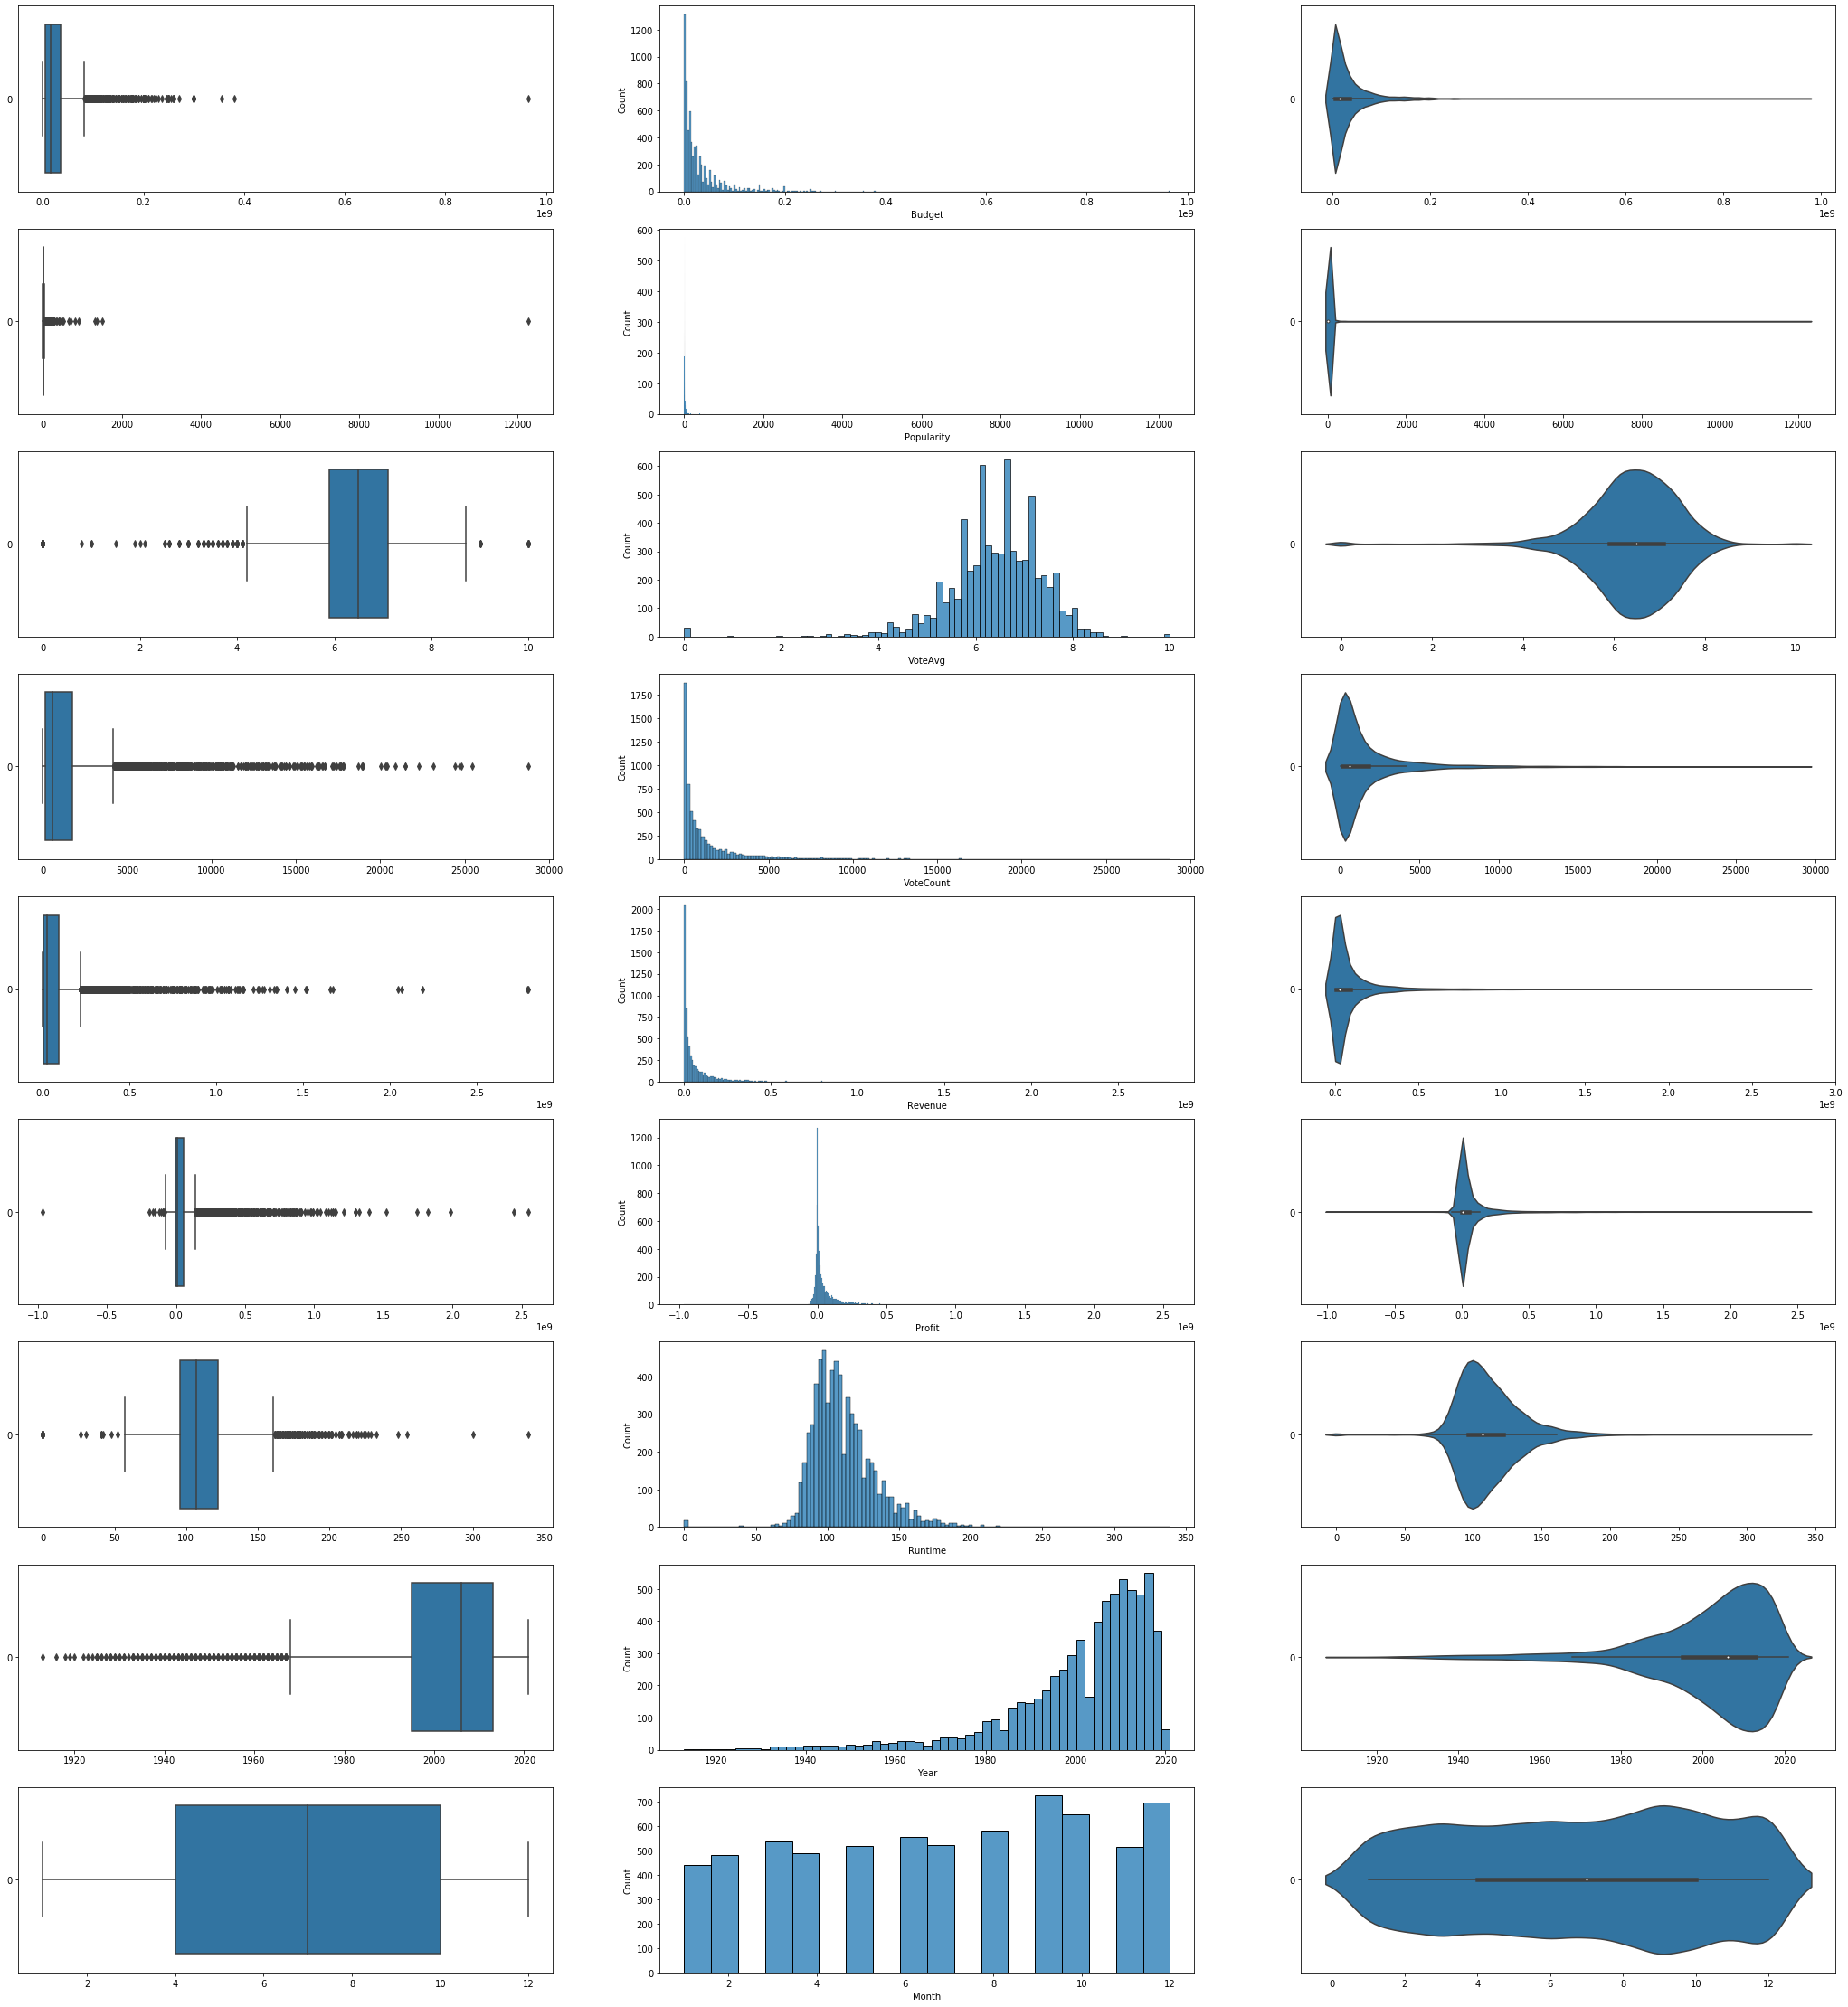

In [15]:
f, axes = plt.subplots(9, 3, figsize=(36, 40))

count = 0
for var in NumericData:
    sb.boxplot(data = NumericData[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = NumericData[var], ax = axes[count,1])
    sb.violinplot(data = NumericData[var], orient = "h", ax = axes[count,2])
    count += 1

              Budget  Popularity   VoteAvg  VoteCount   Revenue    Profit  \
Budget      1.000000    0.124344  0.062589   0.563831  0.709089  0.551682   
Popularity  0.124344    1.000000  0.054346   0.092460  0.096016  0.077877   
VoteAvg     0.062589    0.054346  1.000000   0.329658  0.189201  0.205830   
VoteCount   0.563831    0.092460  0.329658   1.000000  0.763693  0.741482   
Revenue     0.709089    0.096016  0.189201   0.763693  1.000000  0.979299   
Profit      0.551682    0.077877  0.205830   0.741482  0.979299  1.000000   
Runtime     0.135479    0.008930  0.267020   0.158993  0.154639  0.144024   
Year        0.219336    0.053306 -0.096548   0.158579  0.151583  0.116336   
Month       0.031201   -0.011697  0.097735   0.036271  0.032208  0.029141   

             Runtime      Year     Month  
Budget      0.135479  0.219336  0.031201  
Popularity  0.008930  0.053306 -0.011697  
VoteAvg     0.267020 -0.096548  0.097735  
VoteCount   0.158993  0.158579  0.036271  
Revenue     0.

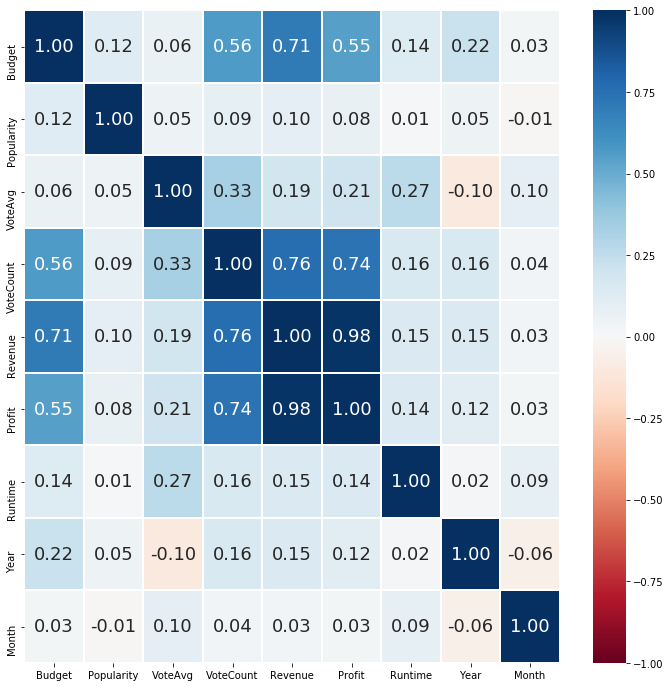

In [16]:

# Correlation Matrix
print(NumericData.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(NumericData.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

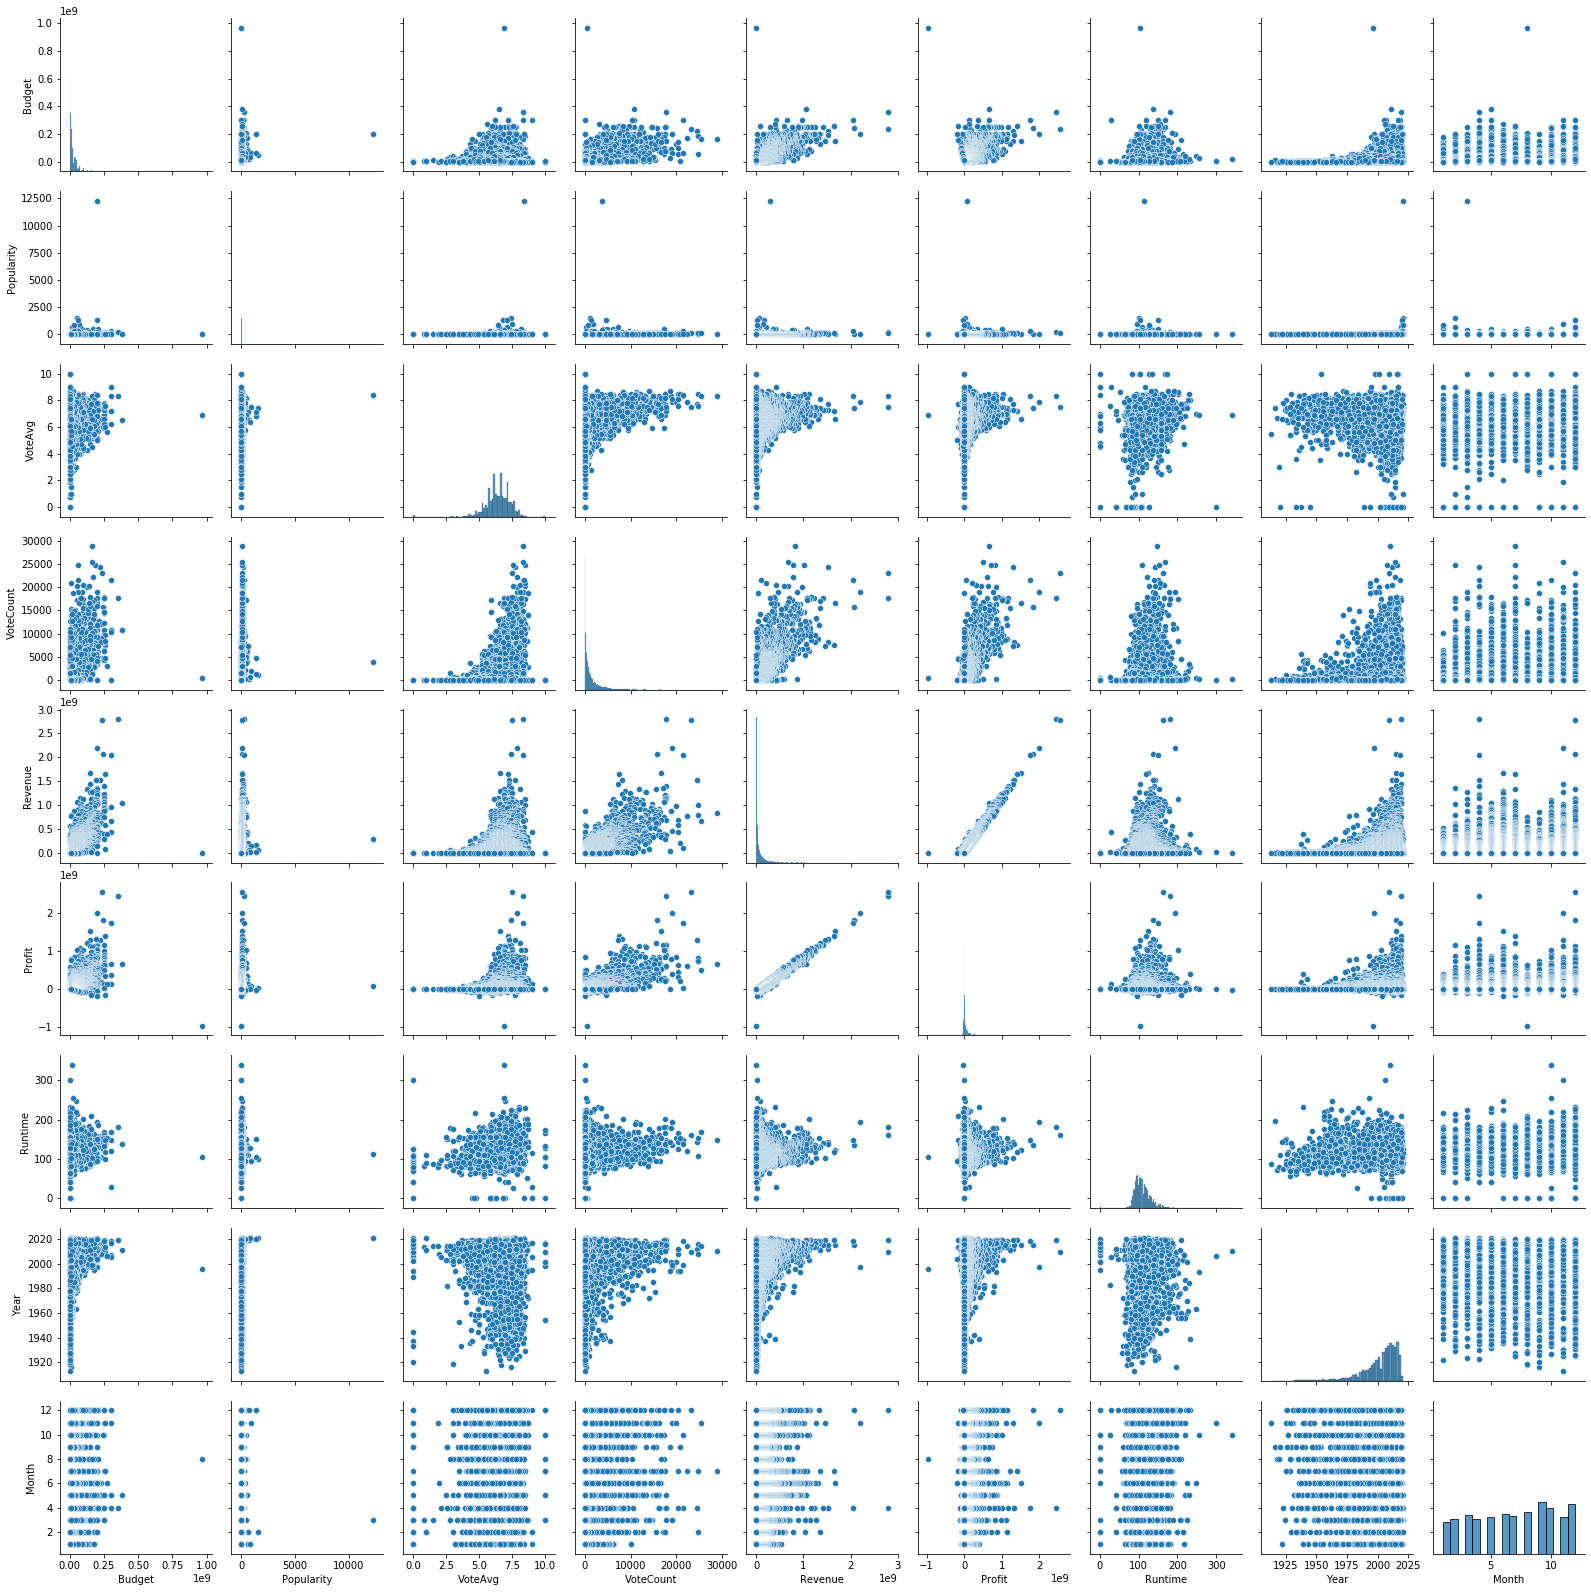

In [34]:
sb.pairplot(data = NumericData)

## Categorical Data

In [17]:
GenreDic = {}
ProComDic ={}
ProCounDic = {}
SpoLangDic = {}
for i in range(len(Movie_CleanedData)): #every row in df
    for j in range(len(Movie_CleanedData.GenreList[i])): #every element in genrelist
        if Movie_CleanedData.GenreList[i][j] not in GenreDic: #if genre is not in dictionary, initialize genre: 1
            GenreDic[str(Movie_CleanedData.GenreList[i][j])] = 1
        elif Movie_CleanedData.GenreList[i][j] in GenreDic:
            GenreDic[str(Movie_CleanedData.GenreList[i][j])] +=1
            
    for j in range(len(Movie_CleanedData.ProductionCompany[i])): #every element in genrelist
        if Movie_CleanedData.ProductionCompany[i][j][0] not in ProComDic: #if genre is not in dictionary, initialize genre: 1
            ProComDic[str(Movie_CleanedData.ProductionCompany[i][j][0])] = 1
        elif Movie_CleanedData.ProductionCompany[i][j][0] in ProComDic:
            ProComDic[str(Movie_CleanedData.ProductionCompany[i][j][0])] +=1
    
    for j in range(len(Movie_CleanedData.ProductionCountry[i])): #every element in genrelist
        if Movie_CleanedData.ProductionCountry[i][j] not in ProCounDic: #if genre is not in dictionary, initialize genre: 1
            ProCounDic[str(Movie_CleanedData.ProductionCountry[i][j])] = 1
        elif Movie_CleanedData.ProductionCountry[i][j] in ProCounDic:
            ProCounDic[str(Movie_CleanedData.ProductionCountry[i][j])] +=1
            
    for j in range(len(Movie_CleanedData.SpokenLanguage[i])): #every element in genrelist
        if Movie_CleanedData.SpokenLanguage[i][j] not in SpoLangDic: #if genre is not in dictionary, initialize genre: 1
            SpoLangDic[str(Movie_CleanedData.SpokenLanguage[i][j])] = 1
        elif Movie_CleanedData.SpokenLanguage[i][j] in SpoLangDic:
            SpoLangDic[str(Movie_CleanedData.SpokenLanguage[i][j])] +=1
            


# print(GenreDic)
# print()
# print(ProComDic)
# print()
# print(ProCounDic)
# print()
# print(SpoLangDic)    

{'Adventure': 1191, 'Science Fiction': 763, 'Action': 1741, 'Fantasy': 667, 'Drama': 3175, 'Romance': 1278, 'Thriller': 1714, 'Family': 724, 'Animation': 375, 'Comedy': 2401, 'Music': 223, 'Crime': 1060, 'Mystery': 543, 'History': 354, 'War': 267, 'Horror': 708, 'Western': 104, 'Documentary': 62, 'TV Movie': 6}

{'Marvel Studios': 26, 'Dune Entertainment': 72, 'Lightstorm Entertainment': 8, '20th Century Fox': 380, 'Ingenious Media': 45, 'Paramount': 380, 'Lucasfilm Ltd.': 25, 'Bad Robot': 15, 'Amblin Entertainment': 71, 'Legendary Pictures': 49, 'Universal Pictures': 488, 'DENTSU': 28, 'The Kennedy/Marshall Company': 26, 'Walt Disney Pictures': 179, 'Fairview Entertainment': 6, 'Abu Dhabi Film Commission': 1, 'China Film Co.': 4, 'Original Film': 42, 'Fuji Television Network': 13, 'Québec Production Services Tax Credit': 2, 'Colorado Office of Film, Television & Media': 1, 'MRC': 21, 'One Race': 11, 'Walt Disney Animation Studios': 25, 'Warner Bros. Pictures': 521, 'Heyday Films': 20,

In [18]:
GenreData = pd.DataFrame(GenreDic, index = ["one"])
GenreData = GenreData.T
GenreData.reset_index(level=0, inplace=True)
GenreData = GenreData.rename(columns={"index": "Genre", "one": "Count"})
GenreData.head()

,Genre,Count
0,Adventure,1191
1,Science Fiction,763
2,Action,1741
3,Fantasy,667
4,Drama,3175


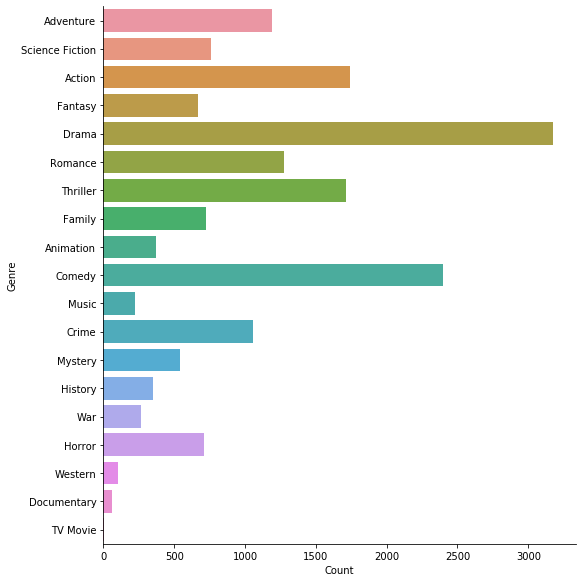

In [19]:
sb.catplot(x = 'Count', y = 'Genre', data = GenreData,kind = 'bar', height = 8)b

Question: How to deal with so many Production Companies?

In [45]:
ProComData = pd.DataFrame(ProComDic, index = ["one"])
ProComData = ProComData.T
ProComData.reset_index(level=0, inplace=True)
ProComData = ProComData.rename(columns={"index": "ProCom", "one": "Count"})
ProComData.drop(ProComData[ProComData.Count < 50].index, inplace=True)
ProComData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 1 to 616
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ProCom  33 non-null     object
 1   Count   33 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 792.0+ bytes


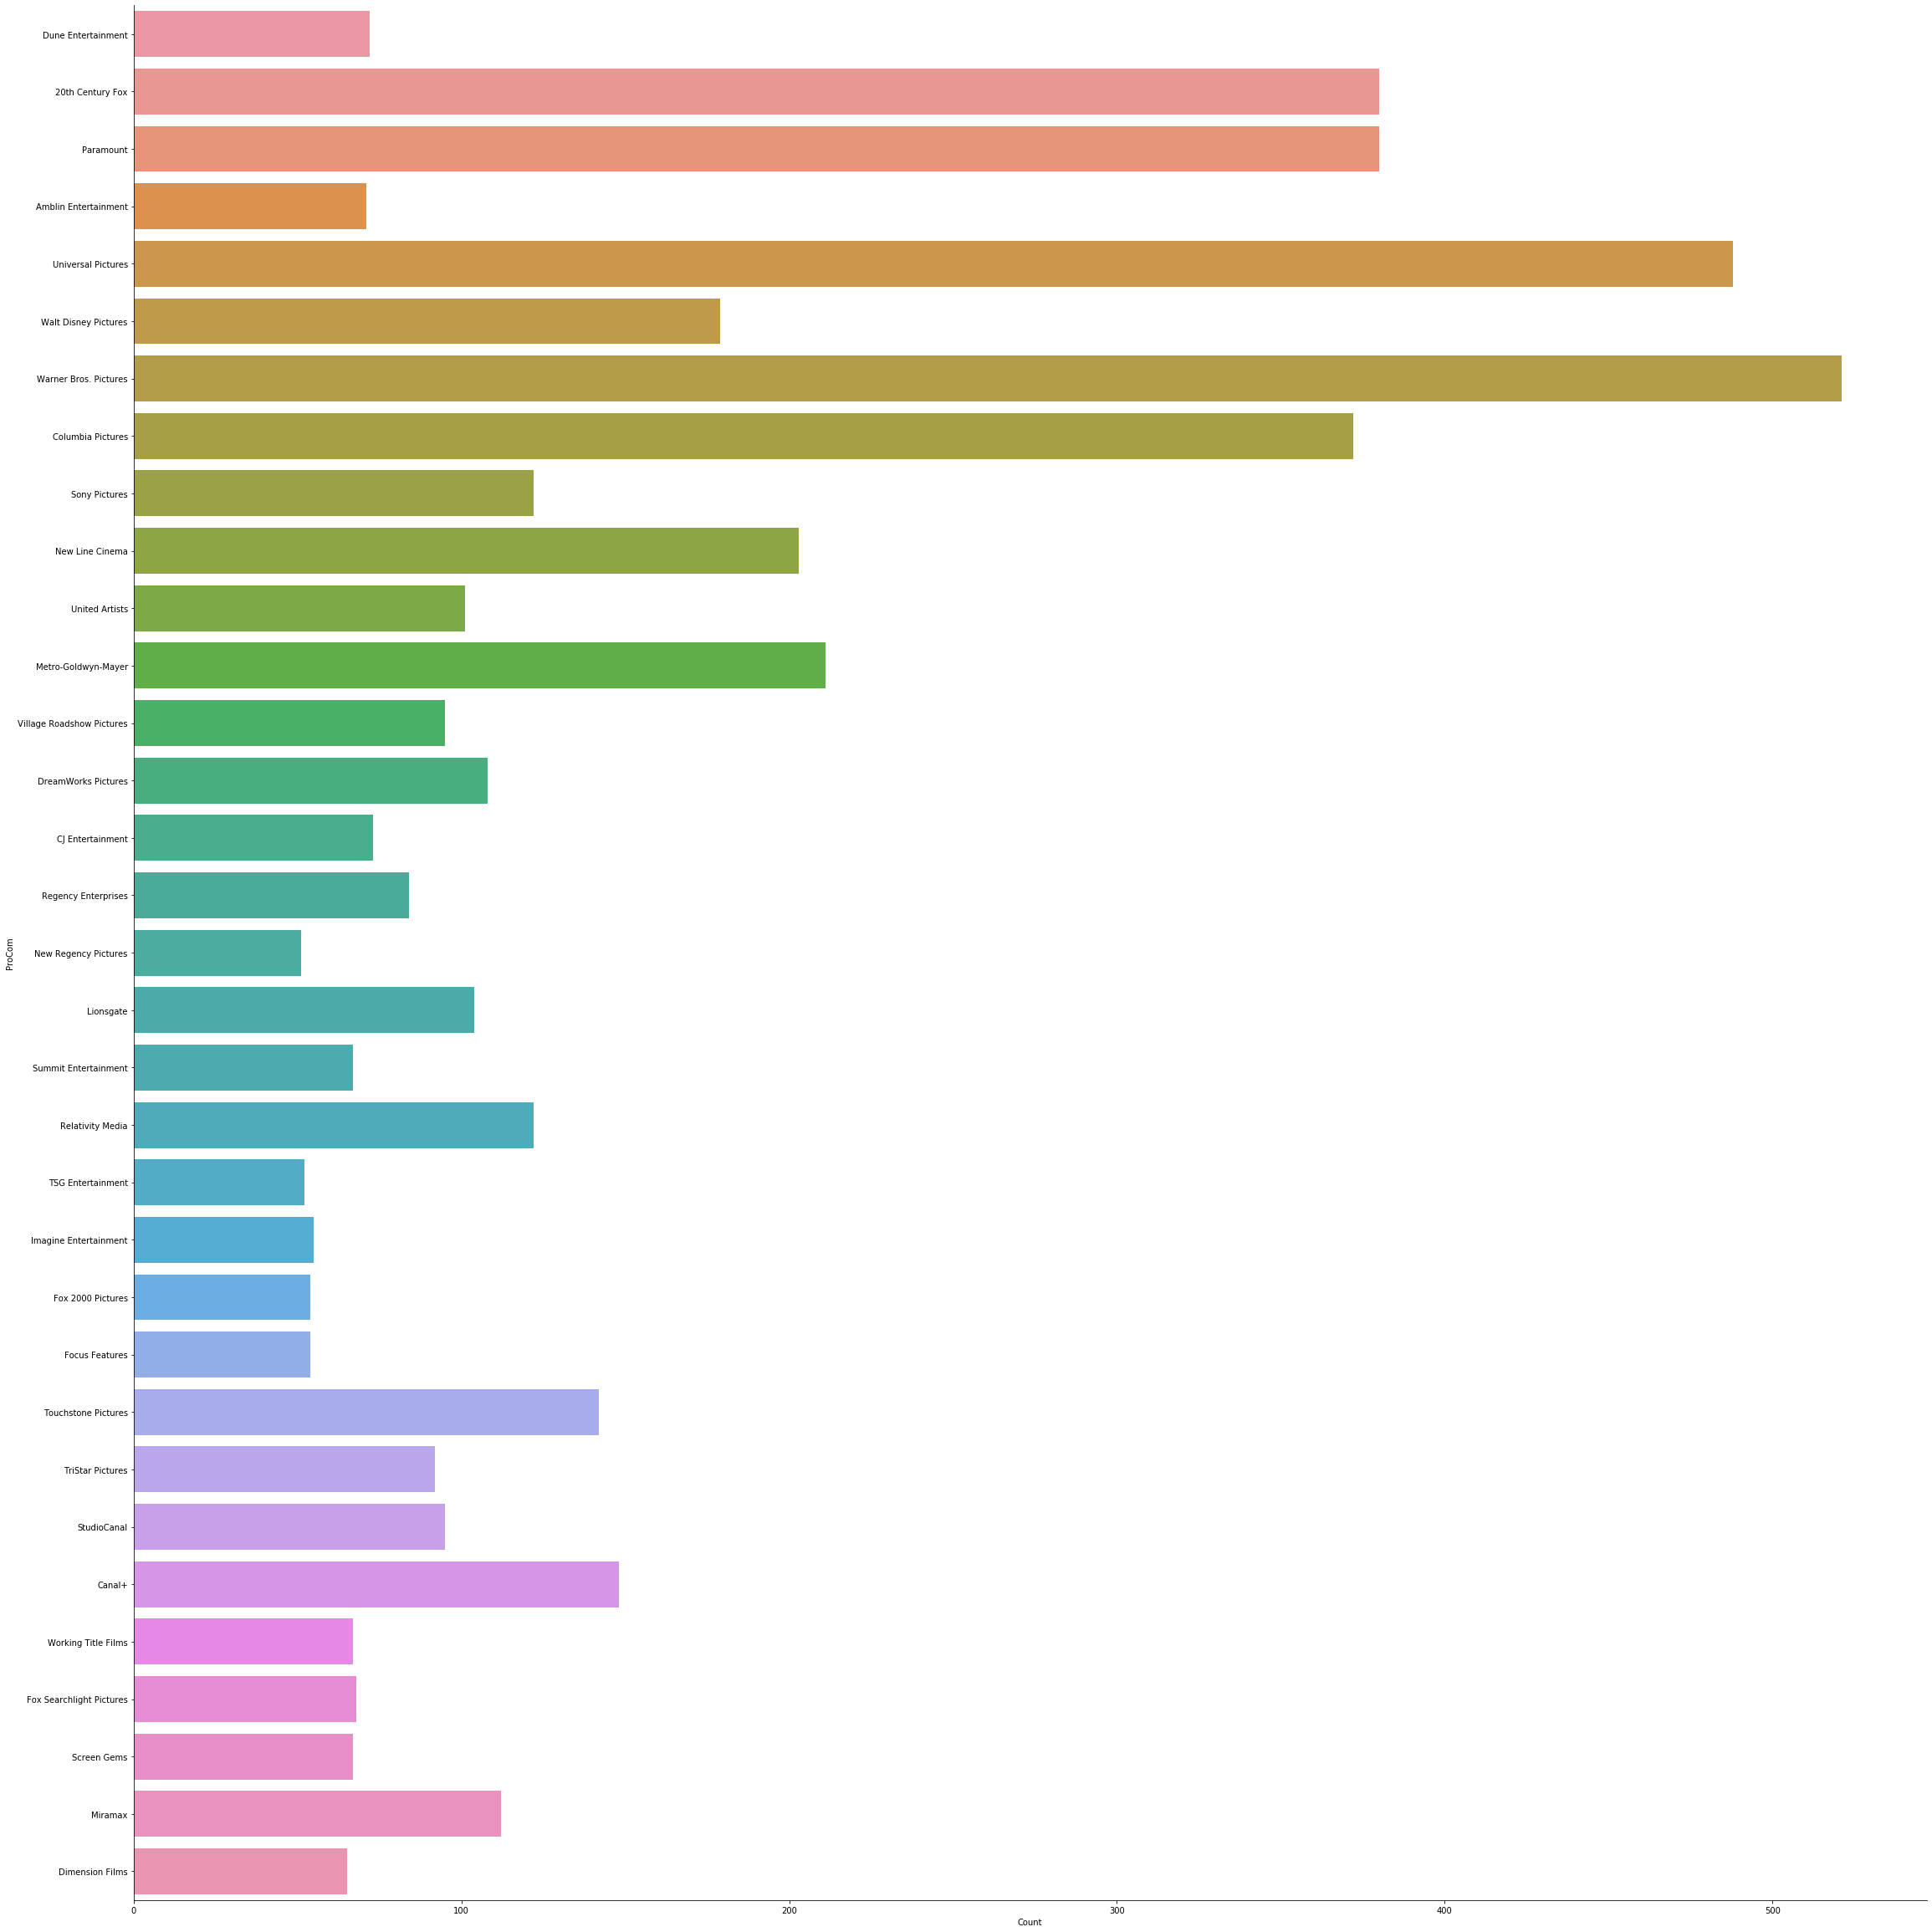

In [46]:
sb.catplot(x = 'Count', y = 'ProCom', data = ProComData,kind = 'bar', height = 32)

In [23]:
ProCounData = pd.DataFrame(ProCounDic, index = ["one"])
ProCounData = ProCounData.T
ProCounData.reset_index(level=0, inplace=True)
ProCounData = ProCounData.rename(columns={"index": "ProCoun", "one": "Count"})
ProCounData.head()

,ProCoun,Count
0,US,5008
1,GB,821
2,AU,138
3,NZ,31
4,CA,312


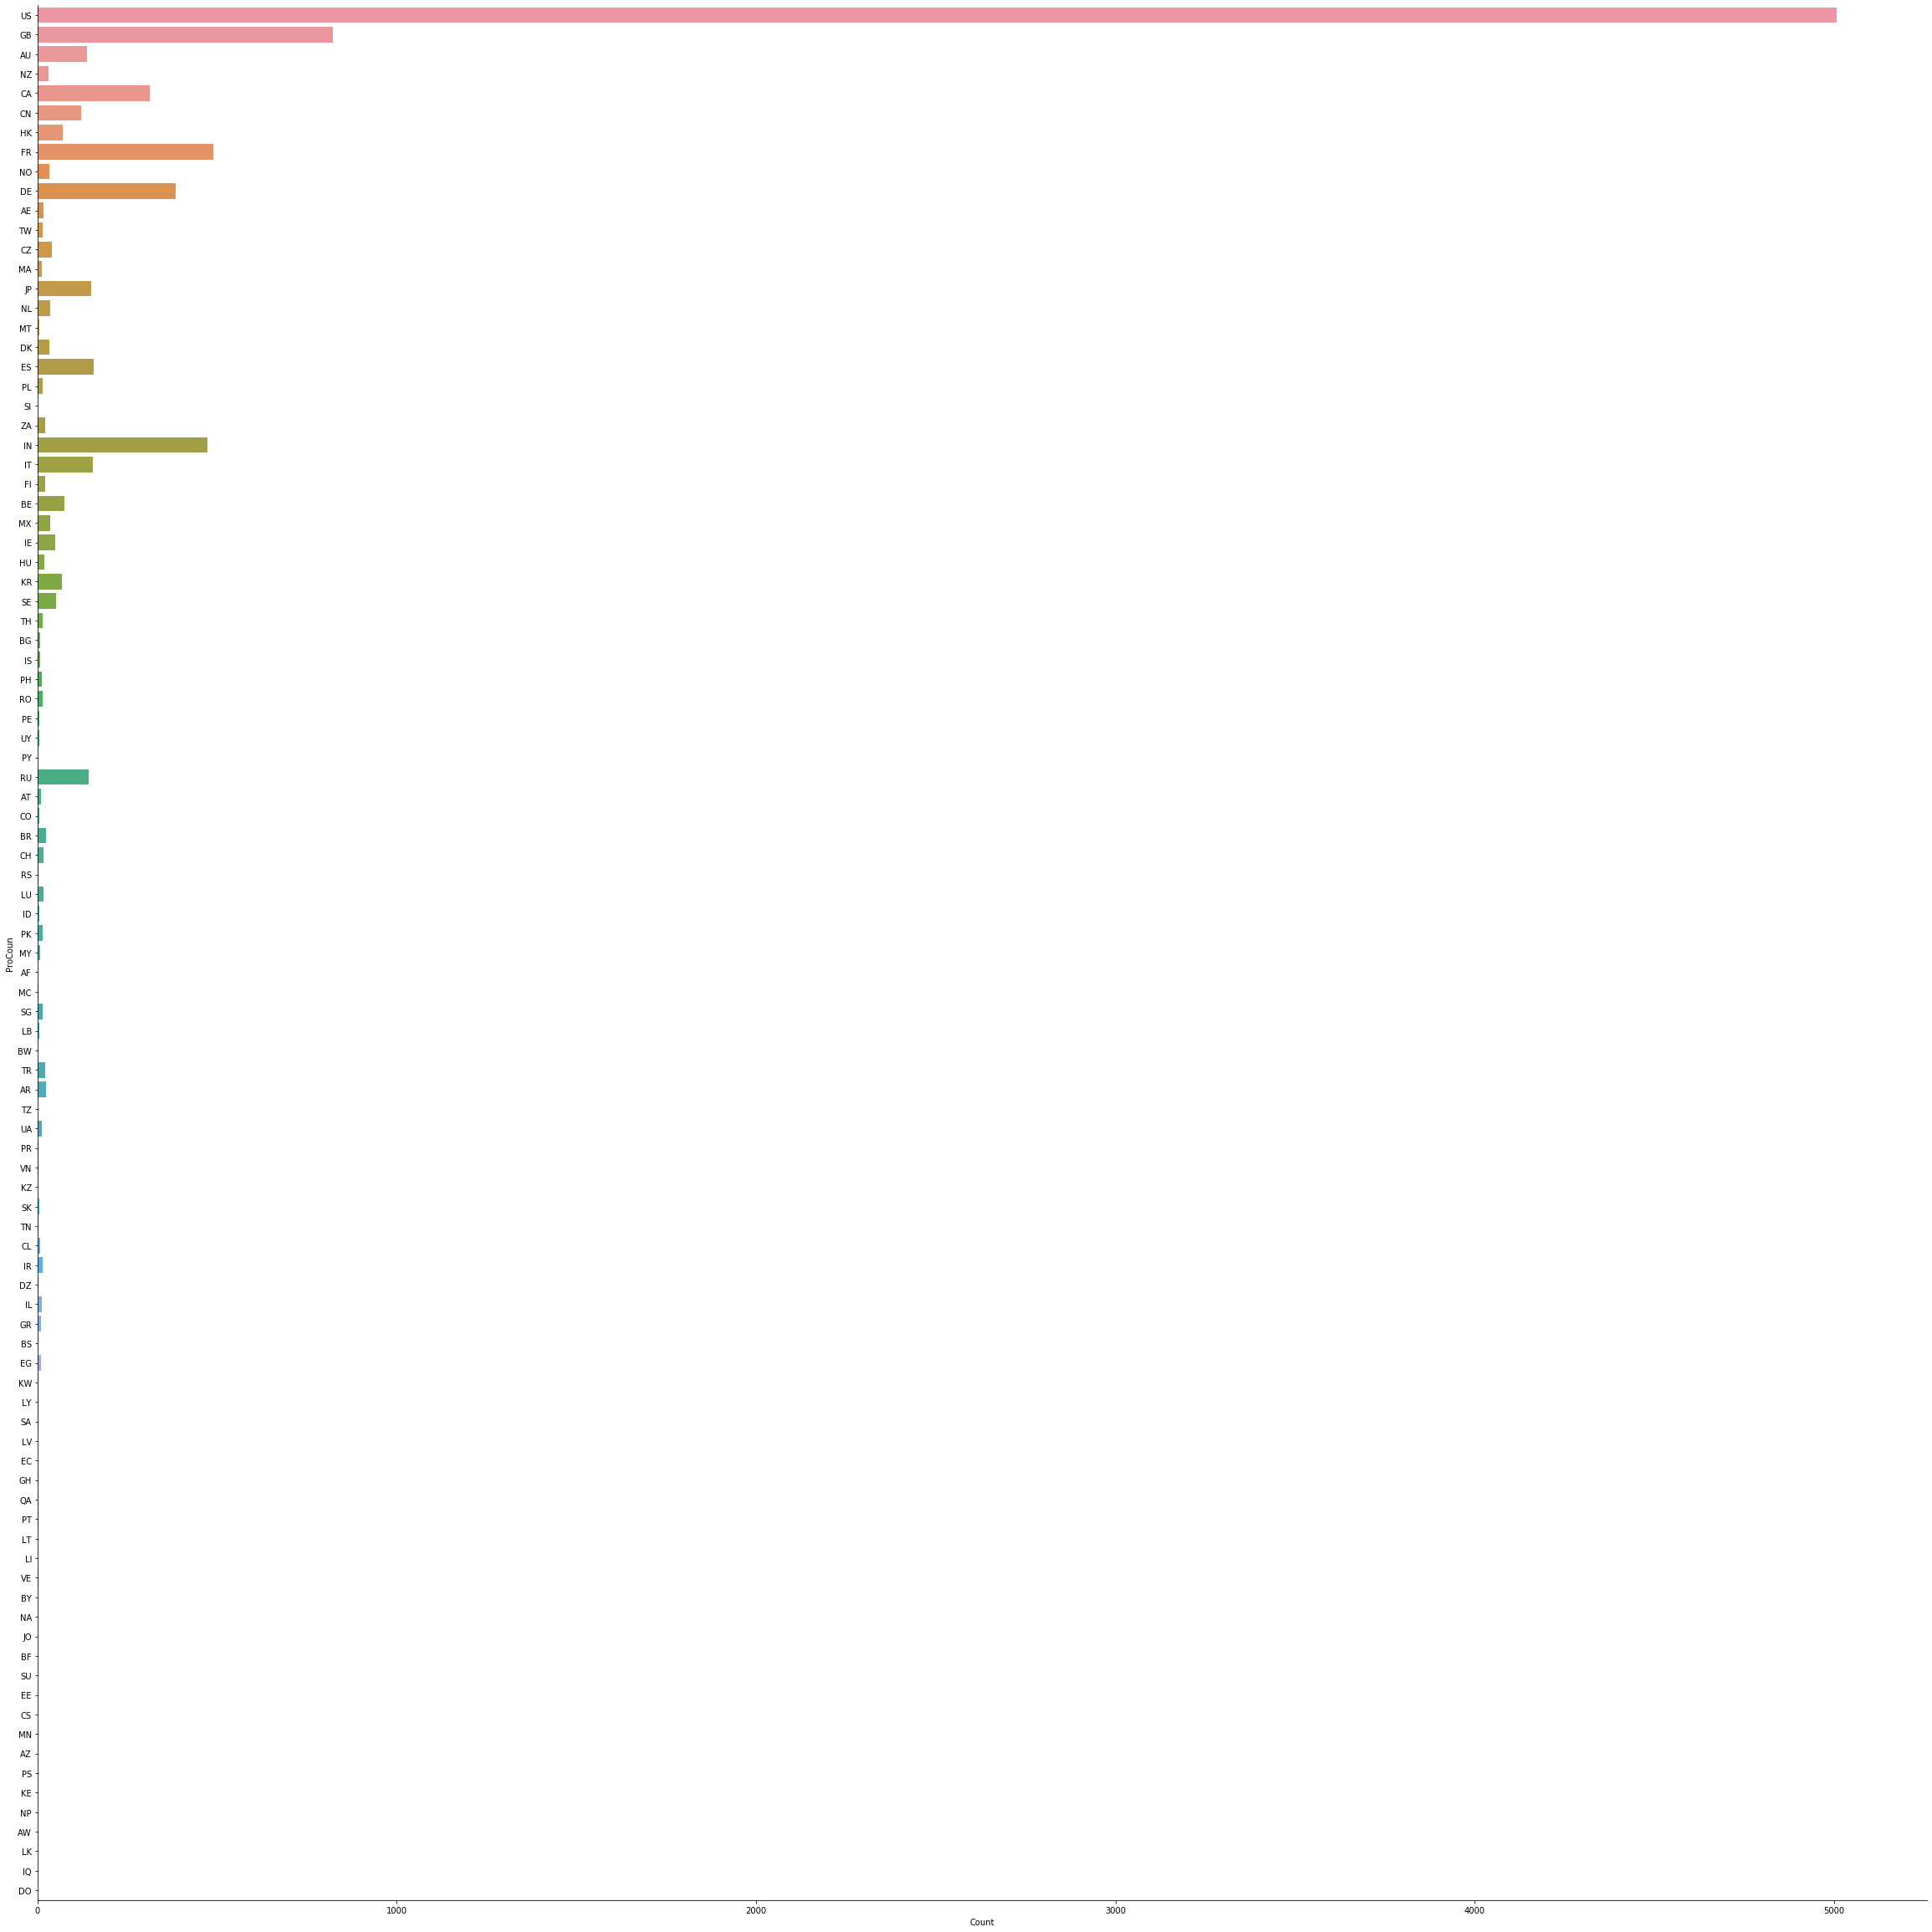

In [32]:
sb.catplot(x = 'Count', y = 'ProCoun', data = ProCounData,kind = 'bar', height = 32)

In [25]:
SpoLangData = pd.DataFrame(SpoLangDic, index = ["one"])
SpoLangData = SpoLangData.T
SpoLangData.reset_index(level=0, inplace=True)
SpoLangData = SpoLangData.rename(columns={"index": "SpoLang", "one": "Count"})
SpoLangData.head()

,SpoLang,Count
0,en,5626
1,ja,198
2,xh,6
3,es,580
4,fr,594


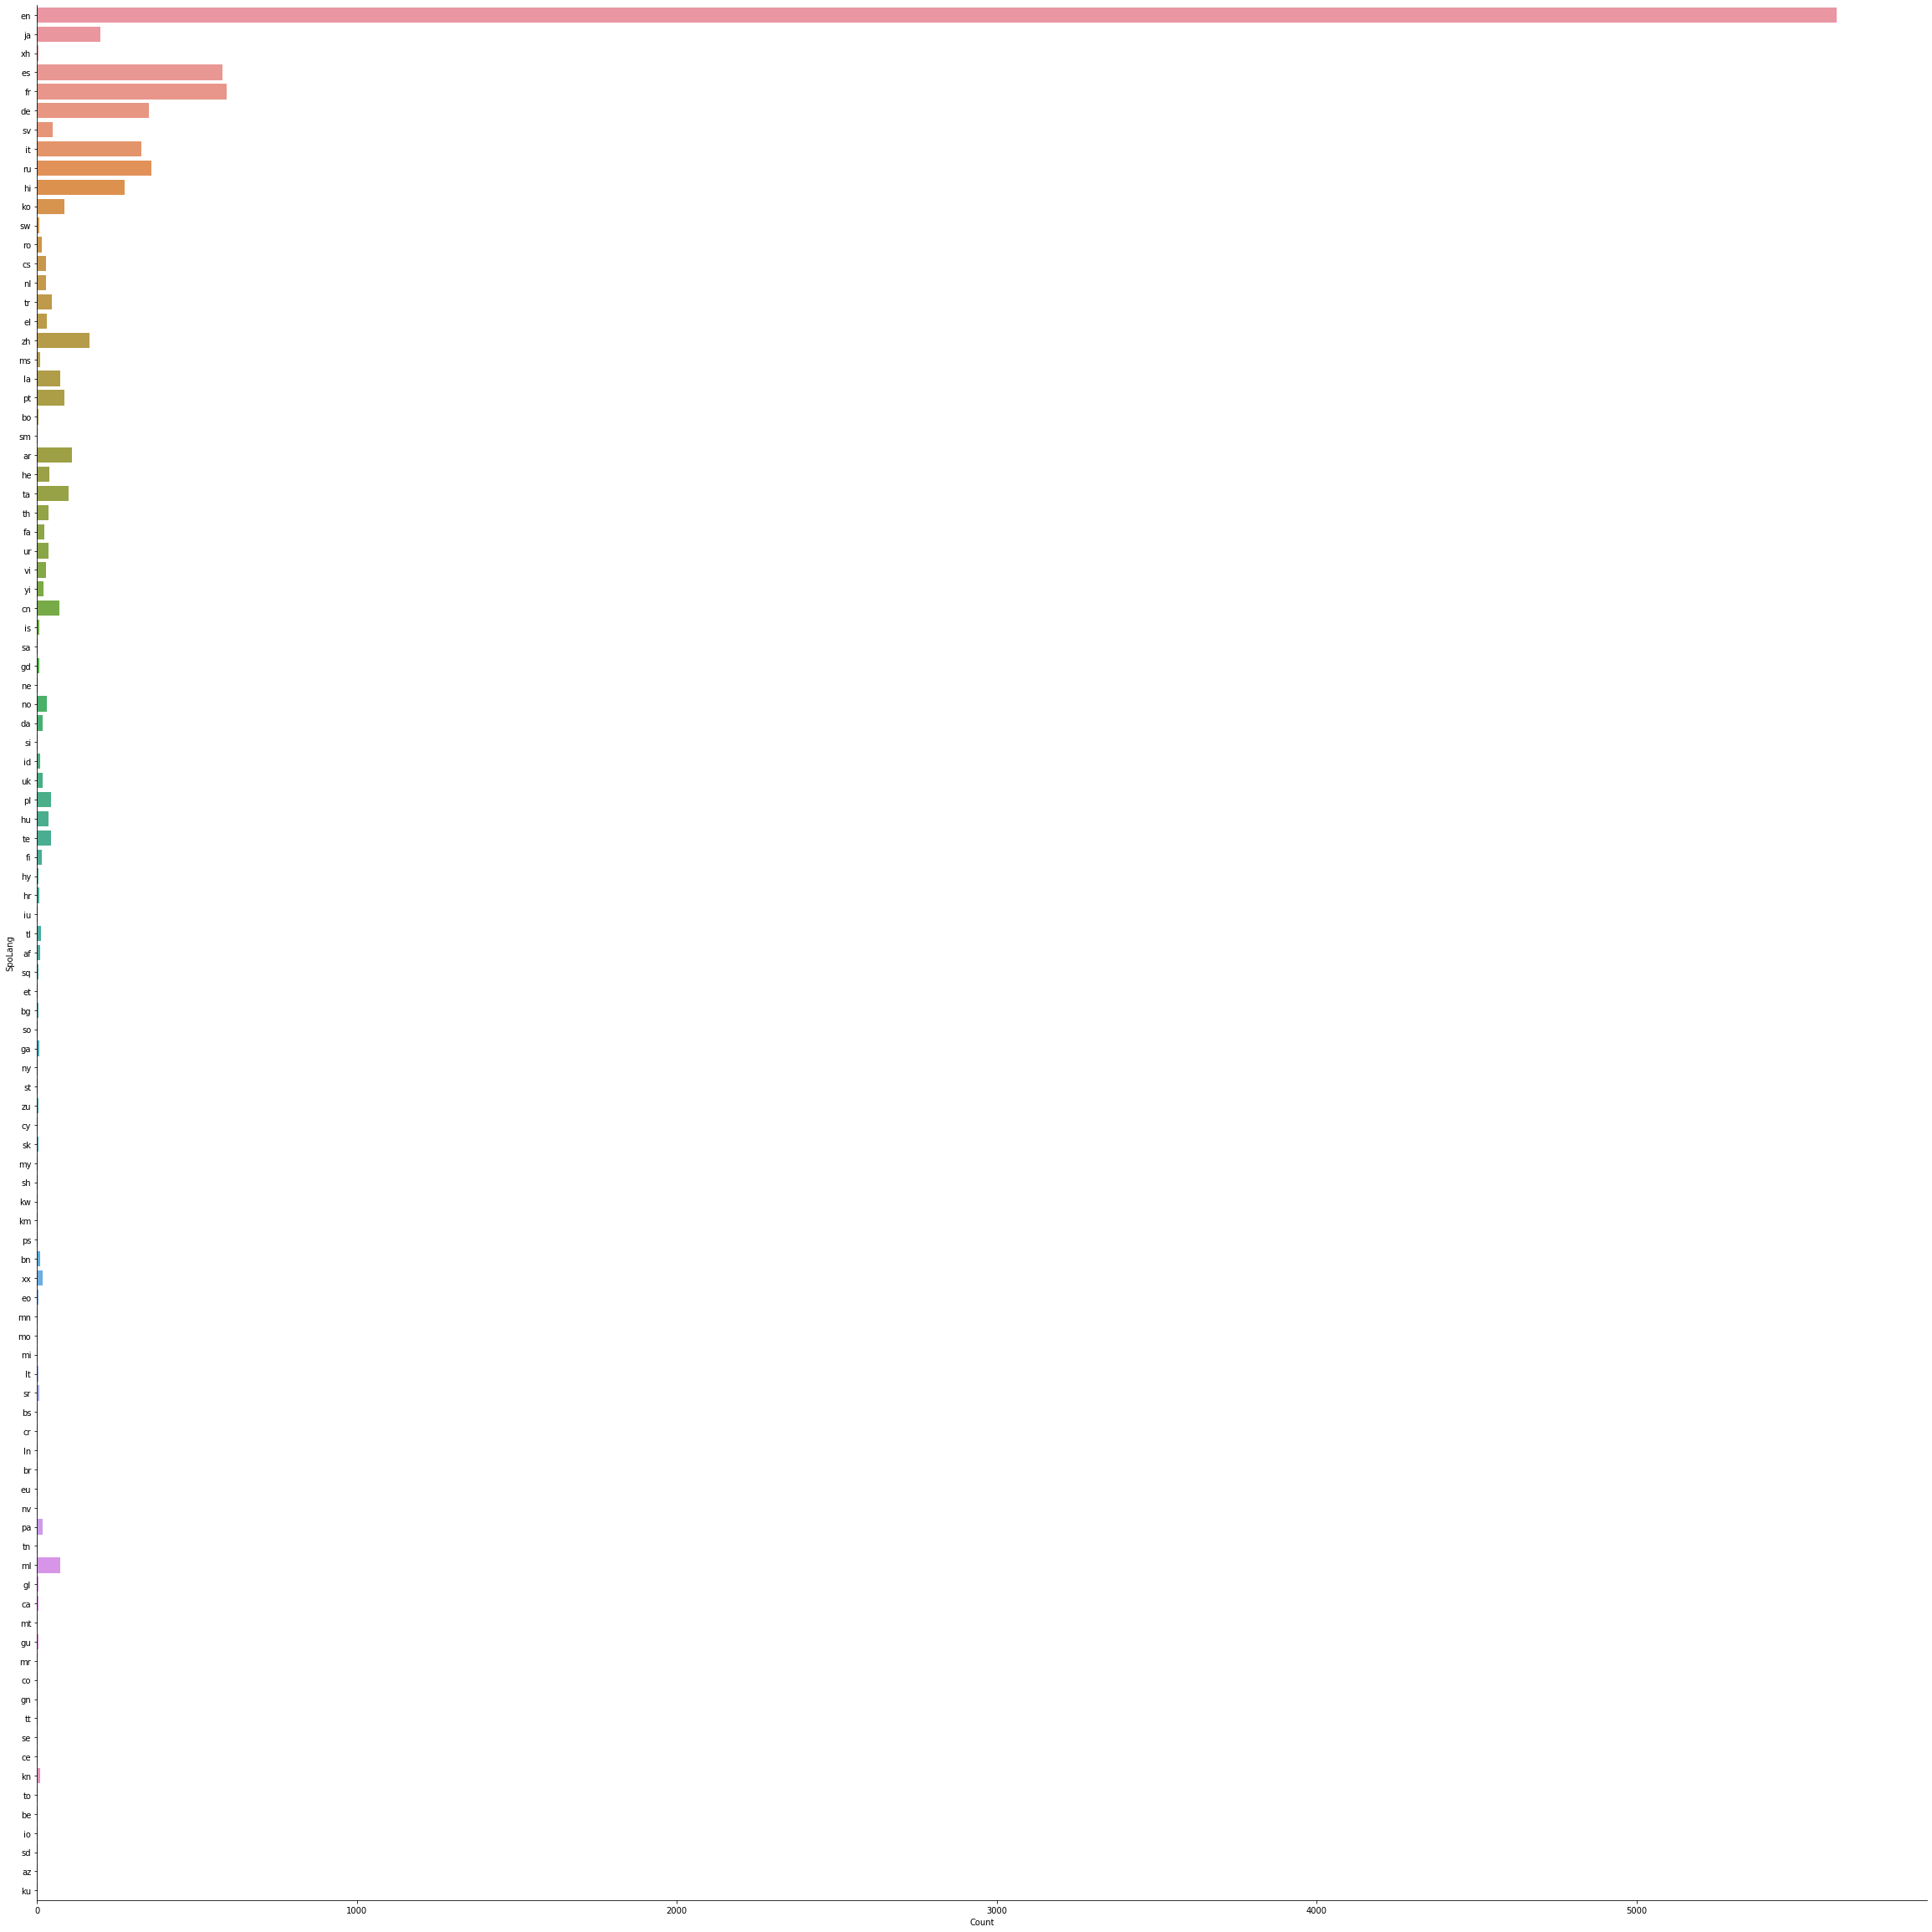

In [33]:
sb.catplot(x = 'Count', y = 'SpoLang', data = SpoLangData,kind = 'bar', height = 32)

In [27]:
# Distribution of BldgType across MSSubClass
f = plt.figure(figsize=(20, 8))
sb.heatmap(houseCatData.groupby(['BldgType', 'MSSubClass']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")